In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
df=pd.read_excel('/ecom customer_data.xlsx')
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

"""EDA"""

df.head()

d=df.copy()
d.info()

d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [ ]:

"""DATA CLEANING"""

d[d.duplicated()]

d.isna().sum()

d['Gender']=d['Gender'].fillna(d["Gender"].mode()[0])

d.isna().sum().sum()


0

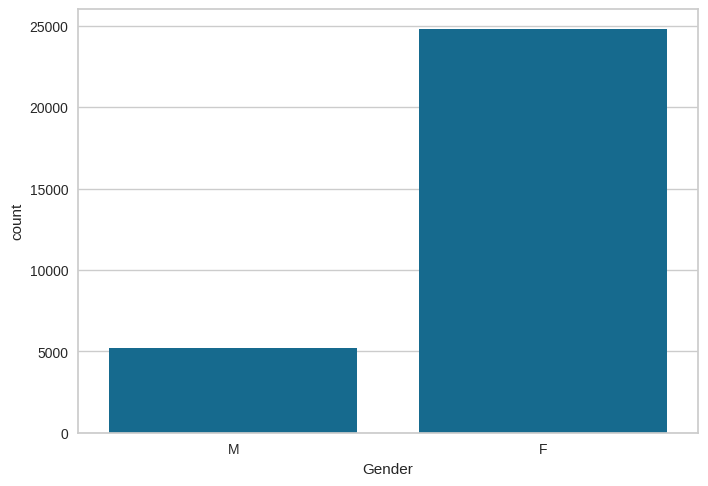

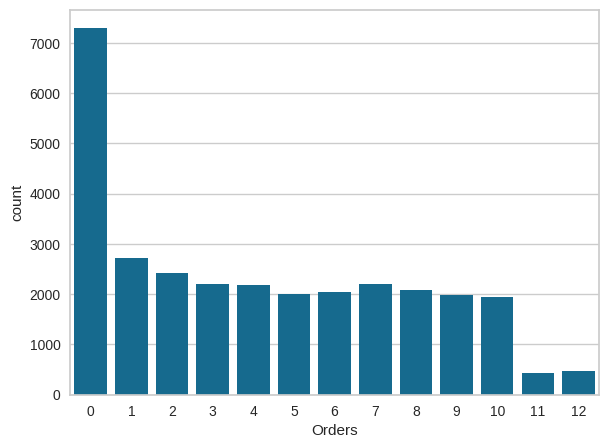

In [ ]:


"""DATA VISUALISATION"""

d.Gender.value_counts()

sns.countplot(data=d,x='Gender')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=d,x='Orders')
plt.show()



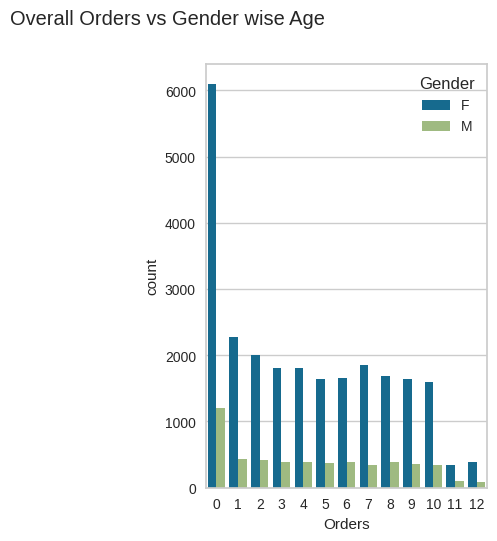

In [ ]:
#Order count by each number
plt.subplot(1,2,2)
sns.countplot(data=d,x='Orders',hue='Gender')
plt.suptitle('Overall Orders vs Gender wise Age')
plt.show()




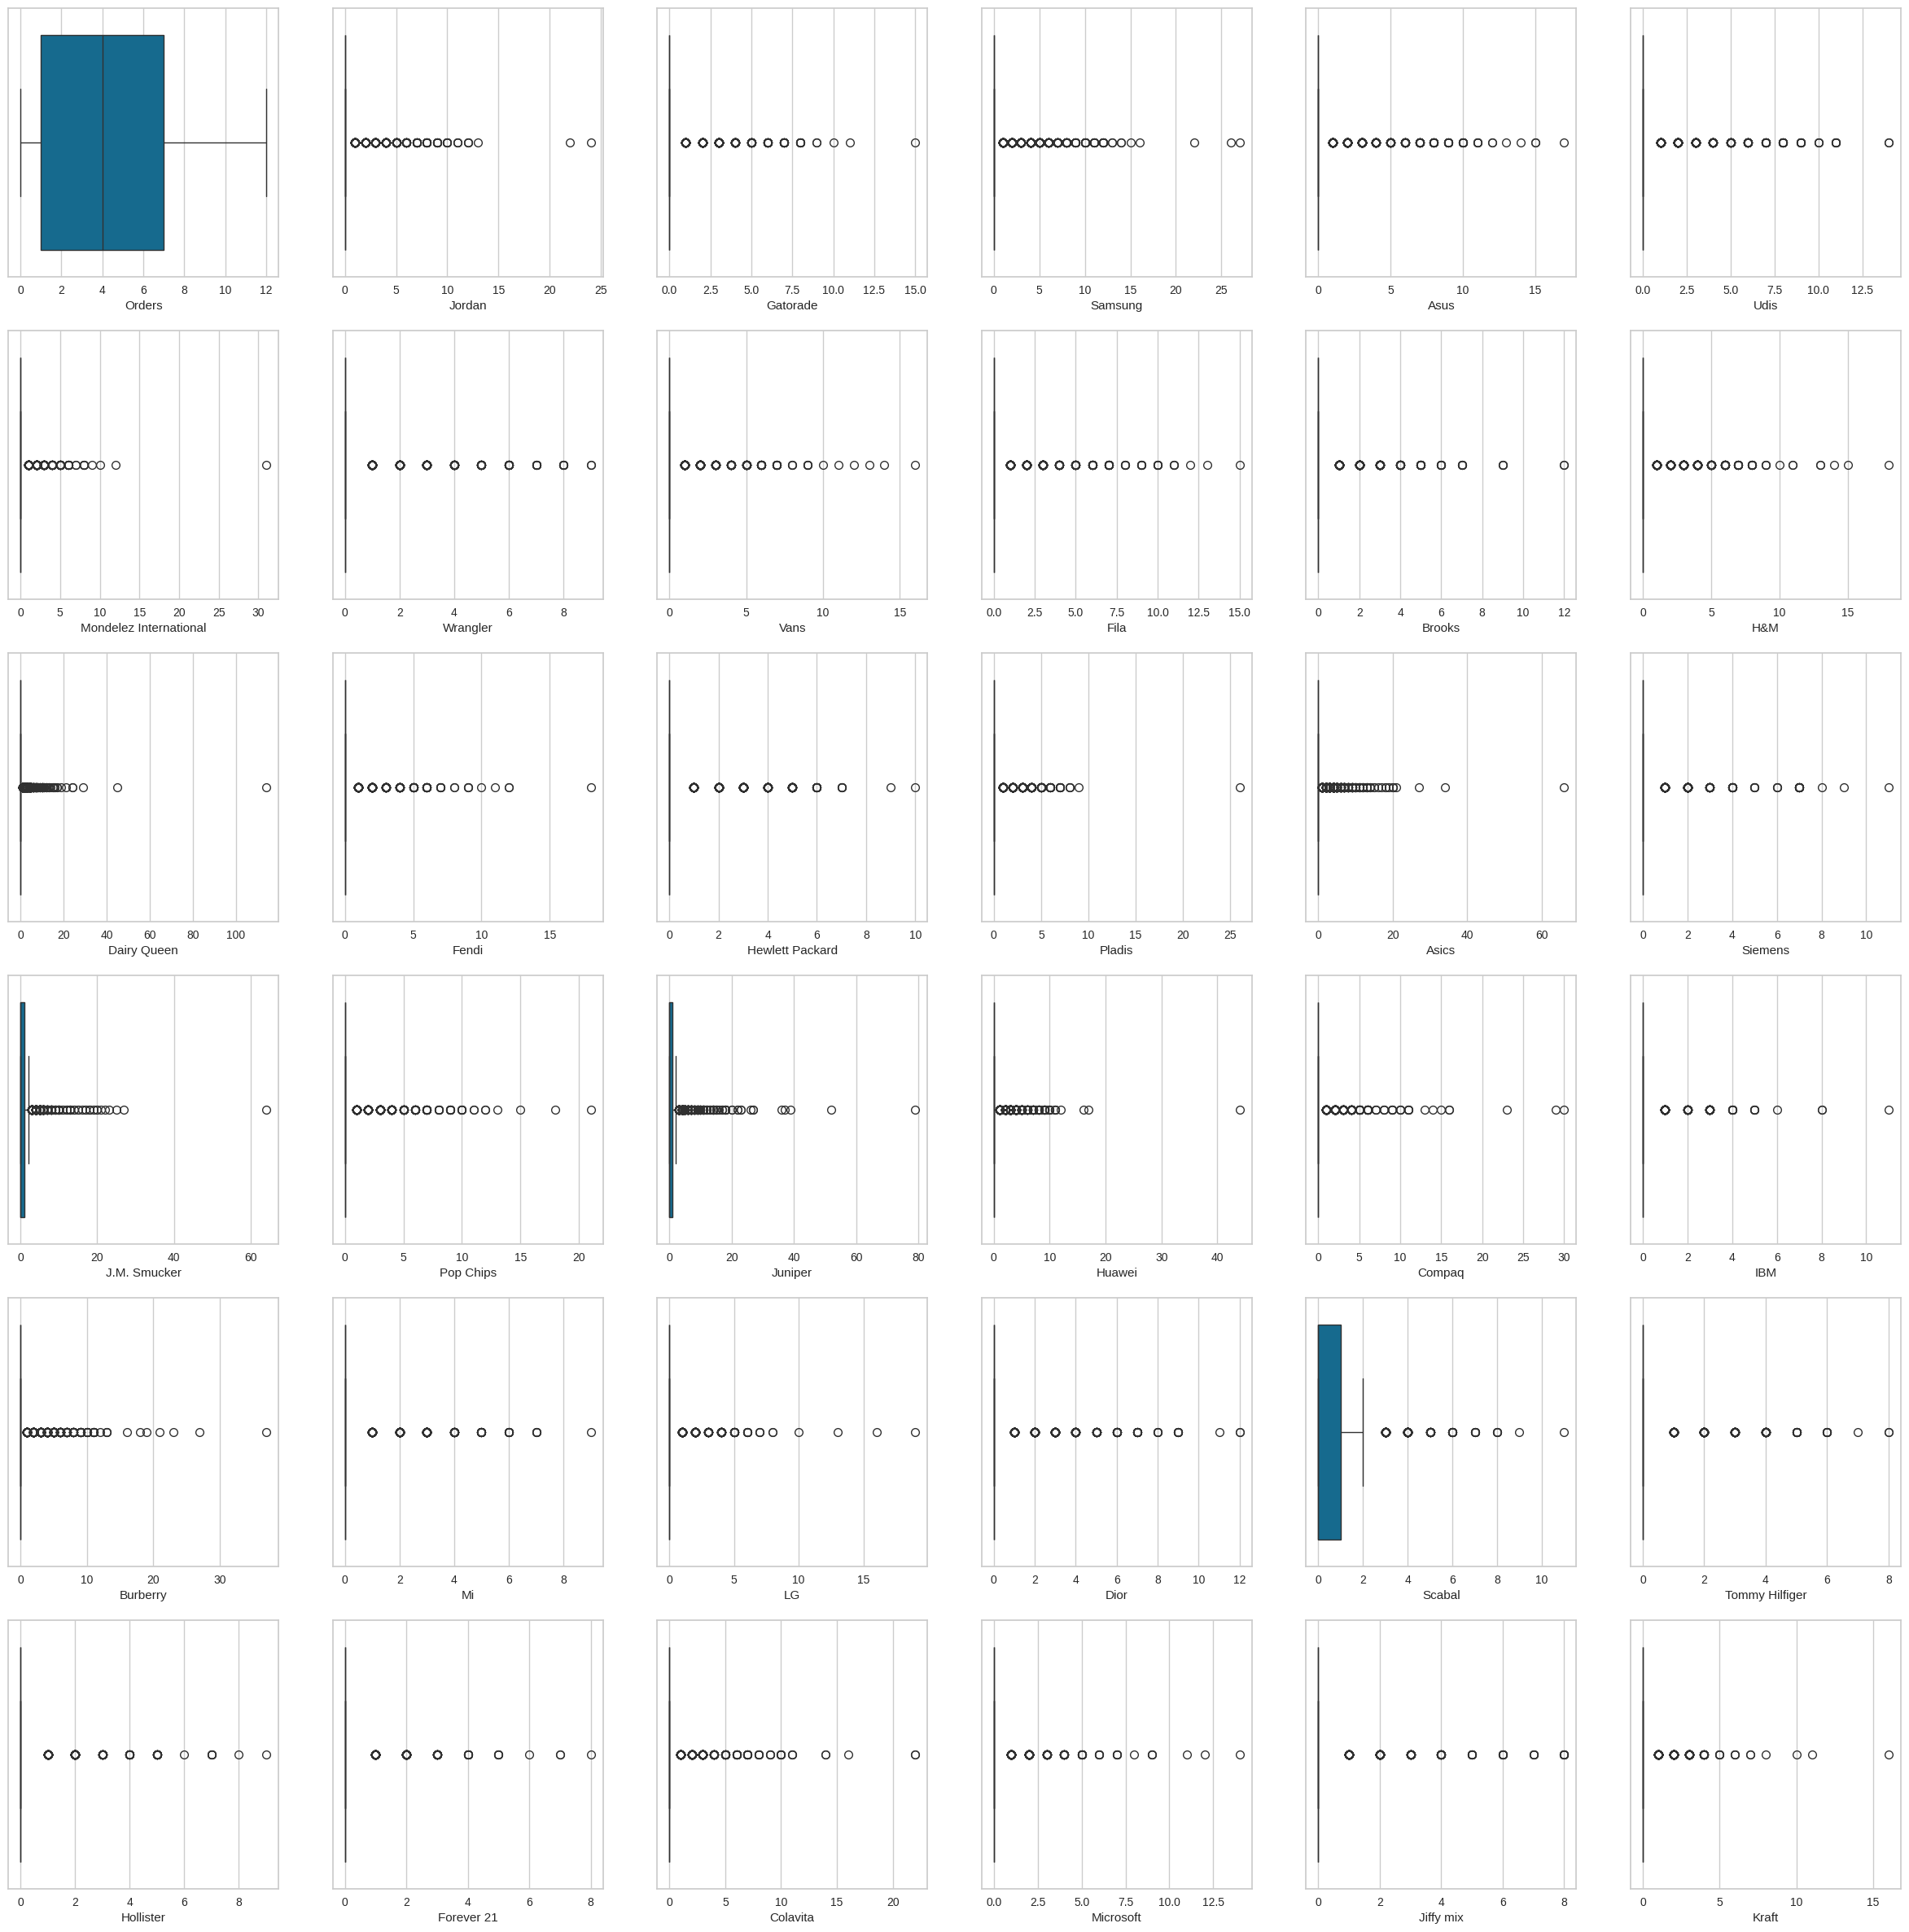

In [ ]:
#Orders and searches for brands
col=list(d.columns[2:])
def dist_list(lst):
  plt.figure(figsize=(30,30))
  for i, col in enumerate(lst,1):
    plt.subplot(6,6,i)
    sns.boxplot(data=d,x=d[col])
  plt.show()
dist_list(col)


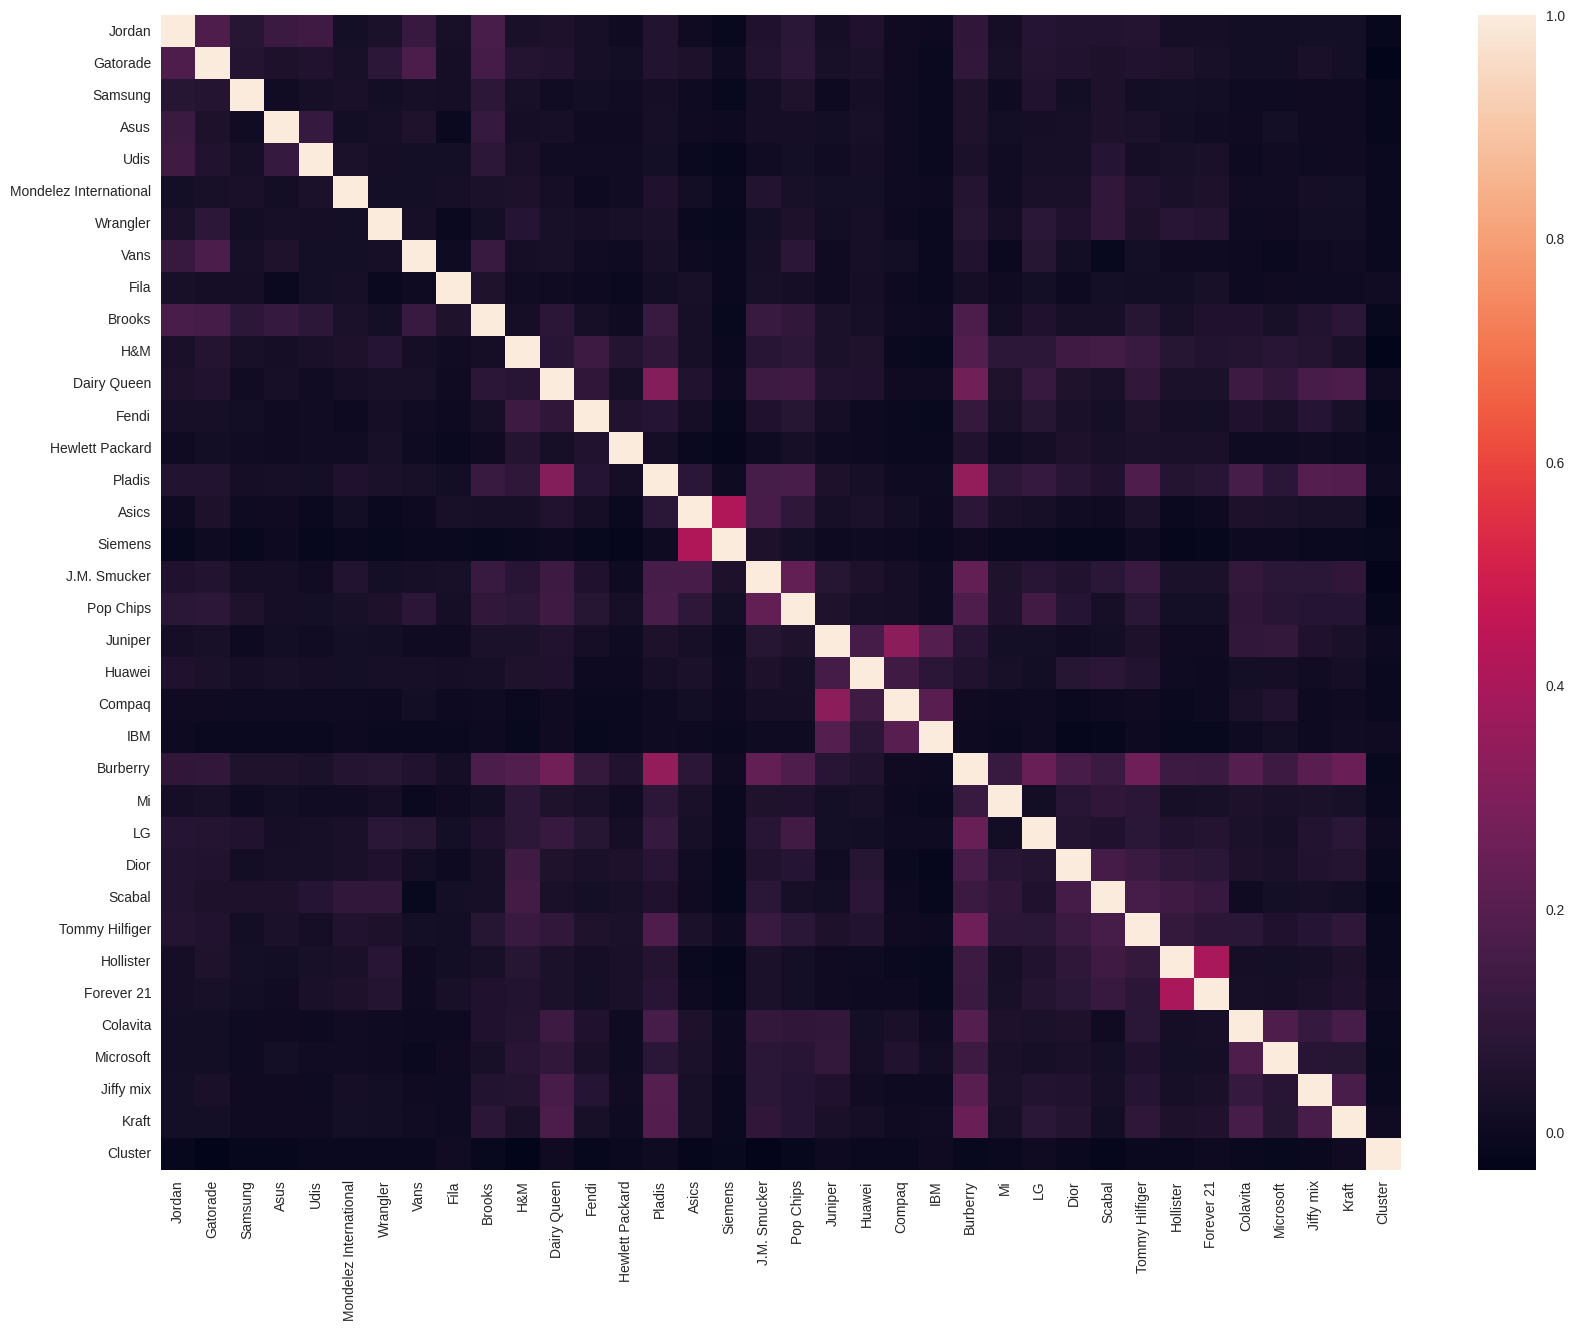

In [ ]:

#Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(d.iloc[:,3:].corr())
plt.show()




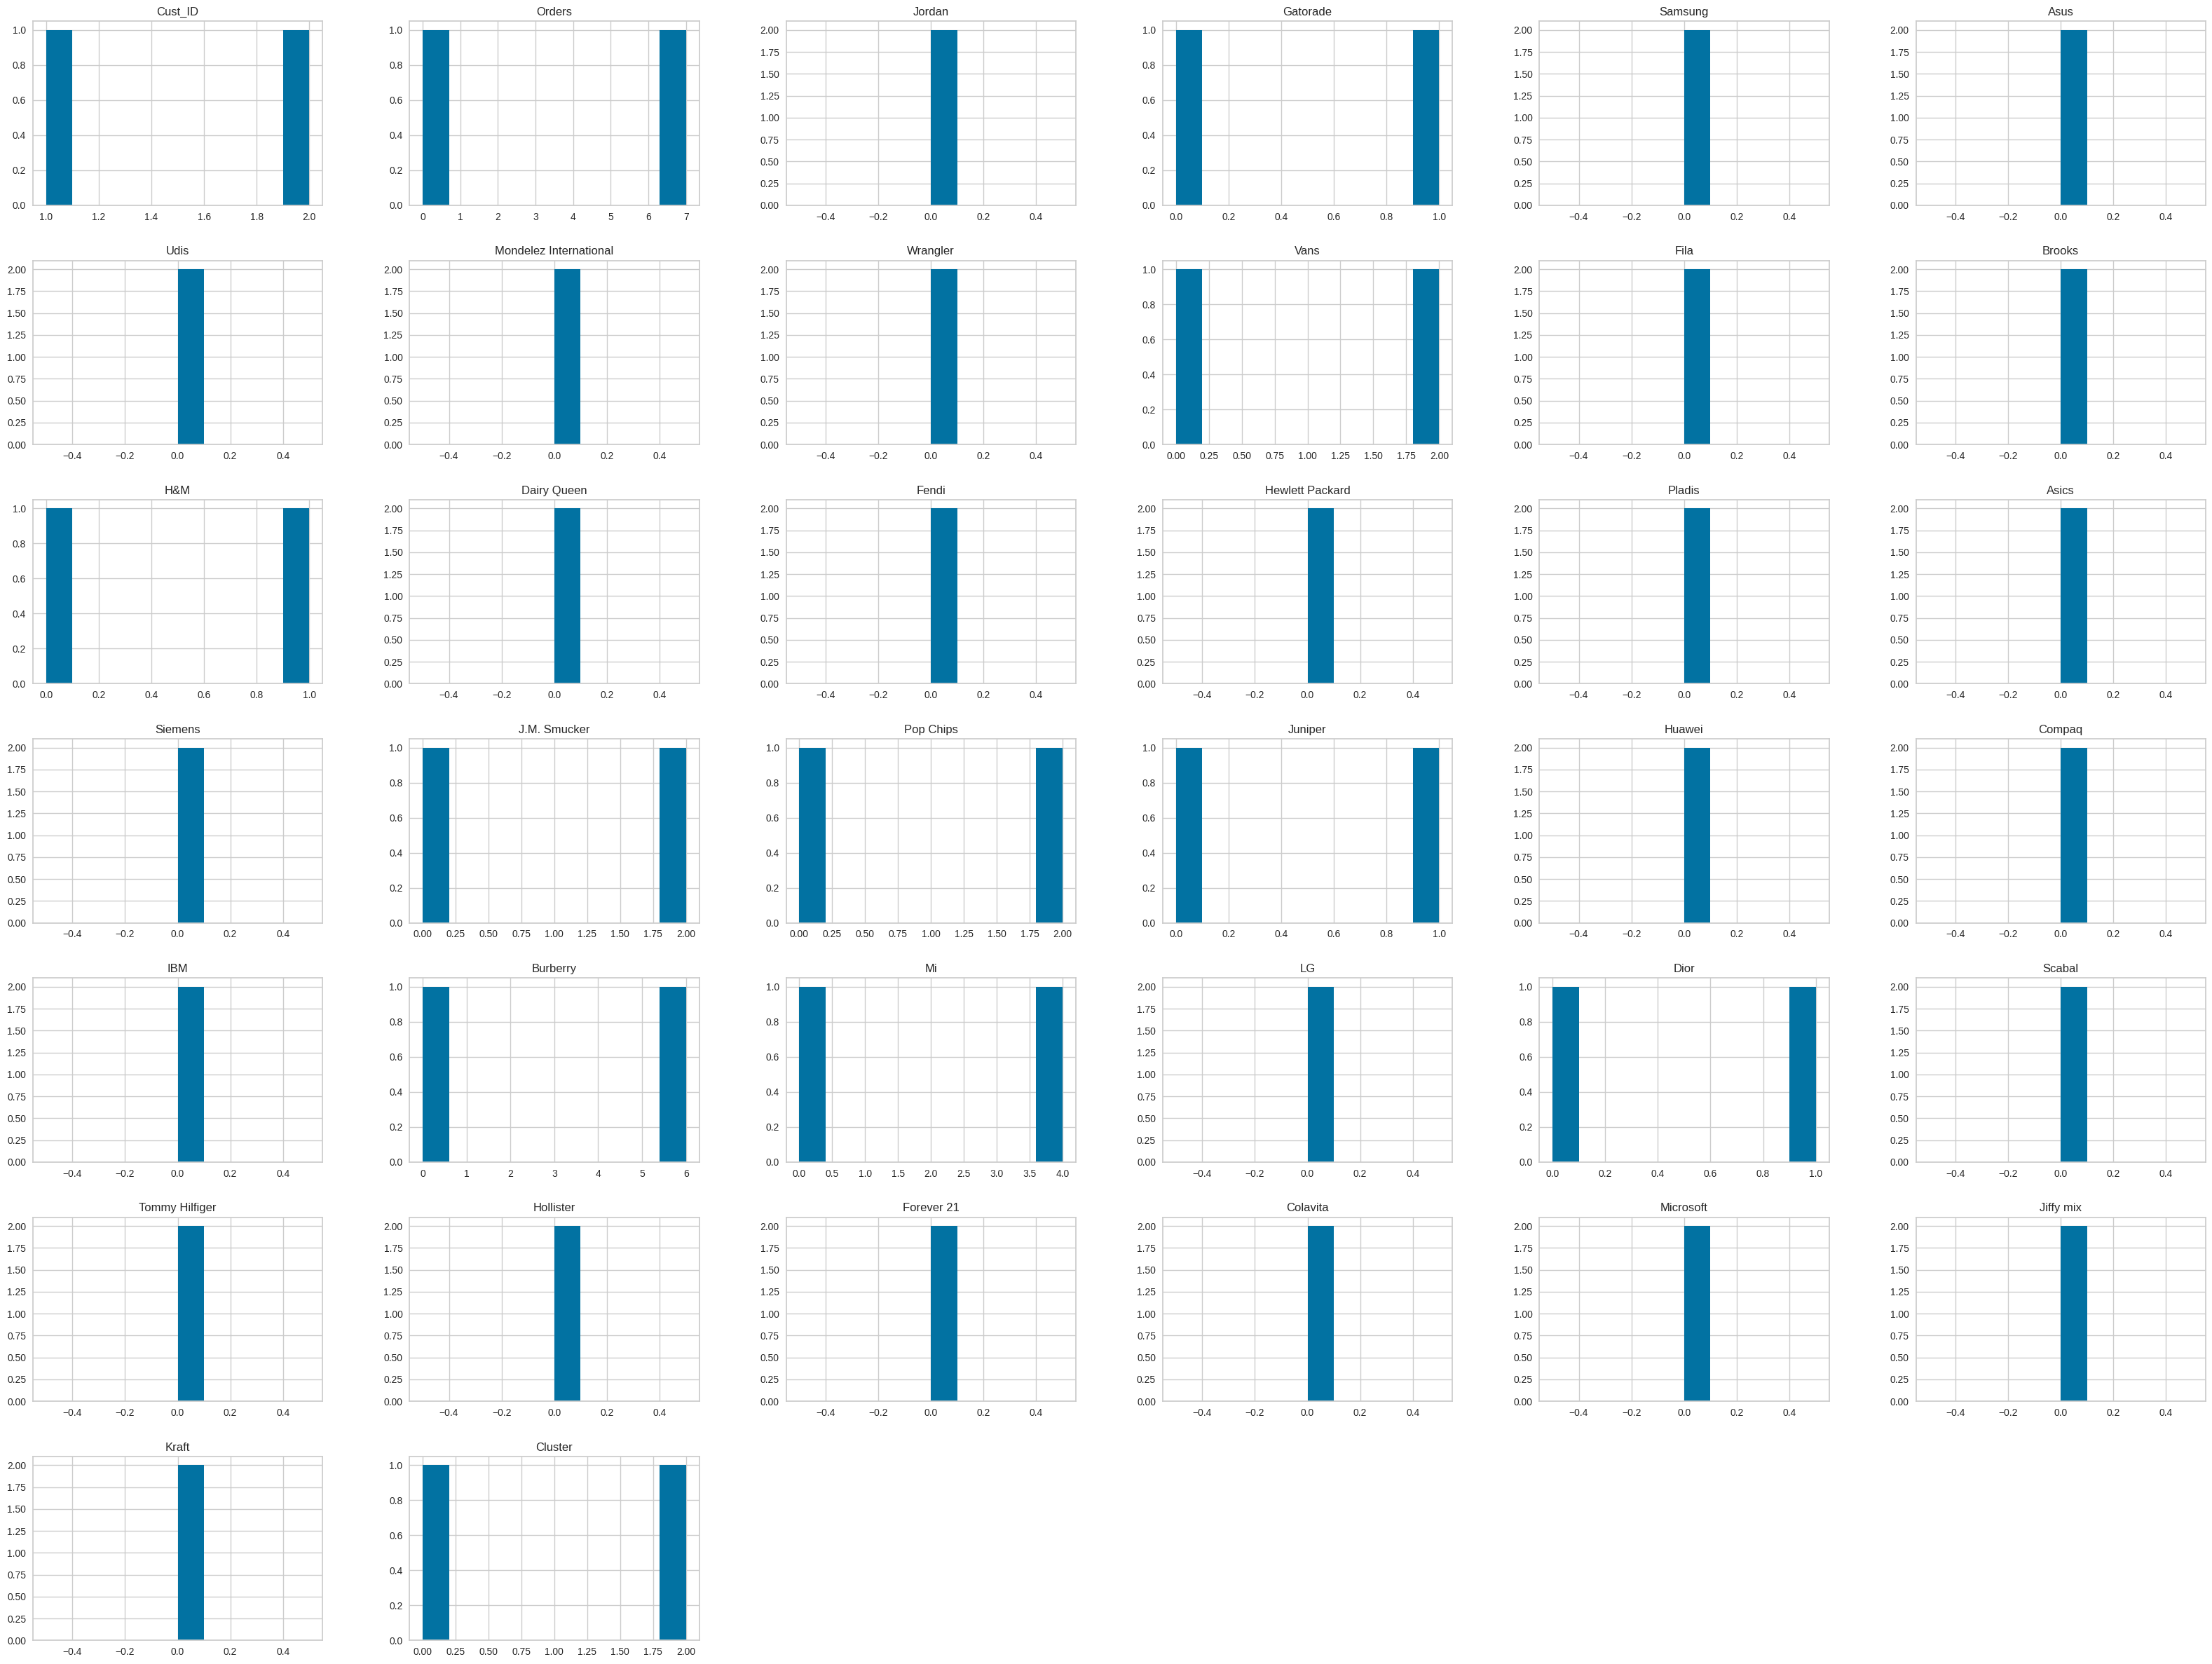

In [ ]:
d.iloc[:2,:].hist(figsize=(40,30))
plt.show()


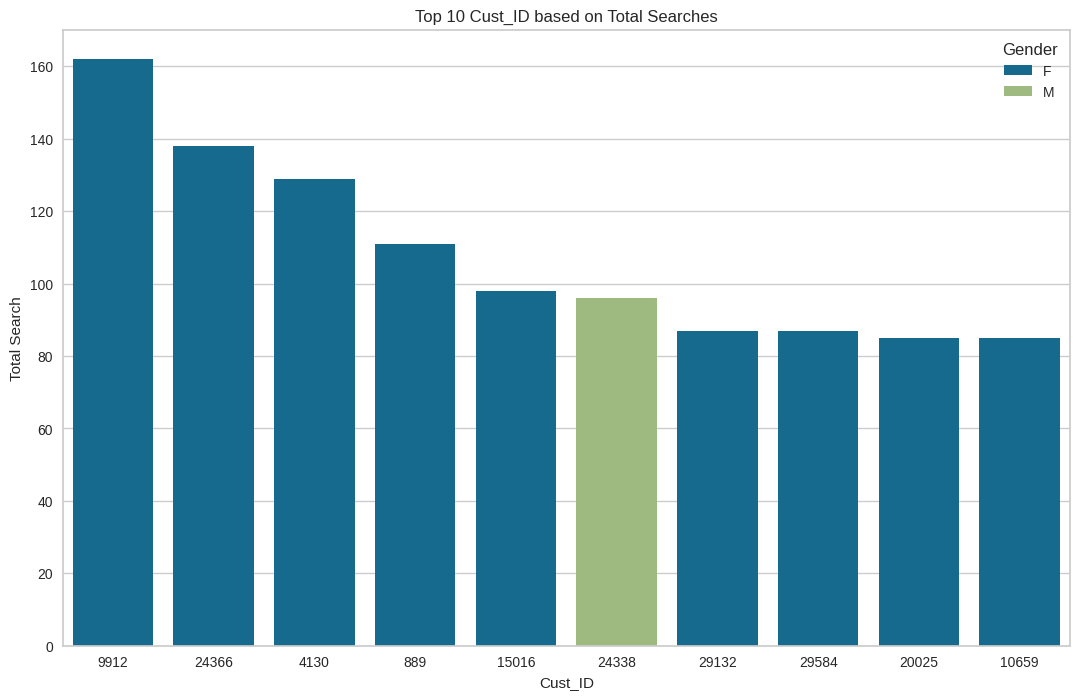

In [ ]:

new_d=d.copy()
new_d['Total Search']=new_d.iloc[:,3:].sum(axis=1)

new_d.sort_values('Total Search', ascending=False)

plt.figure(figsize=(13,8))
plt_data=new_d.sort_values('Total Search', ascending=False)[['Cust_ID','Gender','Total Search']].head(10)
sns.barplot(data=plt_data,x='Cust_ID',y='Total Search',hue='Gender',order=plt_data.sort_values('Total Search', ascending=False).Cust_ID)
plt.title("Top 10 Cust_ID based on Total Searches")
plt.show()

In [ ]:

"""SCALING"""

x=d.iloc[:,2:].values
x

scale=MinMaxScaler()
features=scale.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        1.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.5       ]])

In [ ]:


"""Elbow method to get the optimal K value"""

inertia=[]
for i in range(1,16):       #To get 15 results
  k_means=KMeans(n_clusters=i)
  k_means=k_means.fit(features)
  inertia.append(k_means.inertia_)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

(Text(0.5, 0, 'No of clusters'), Text(0, 0.5, 'Inertia'))

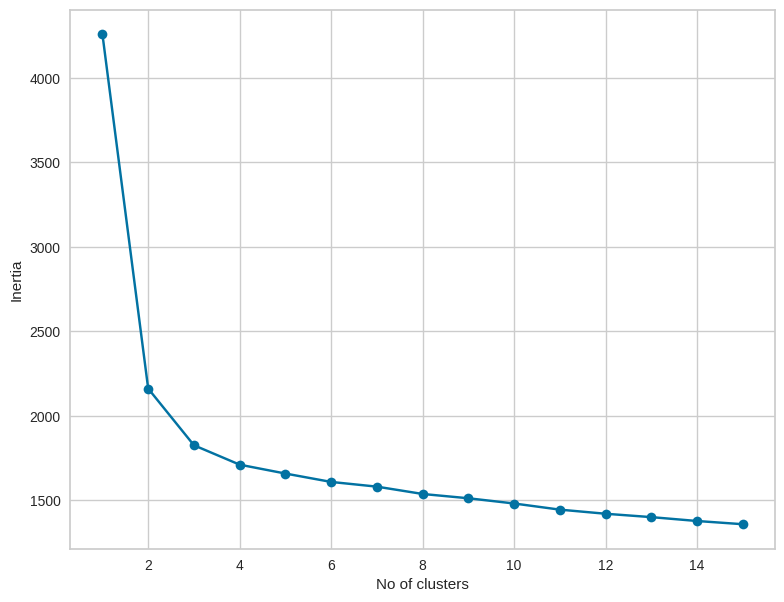

In [ ]:

#Elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16), inertia, 'bo-')
plt.xlabel('No of clusters'),plt.ylabel("Inertia")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

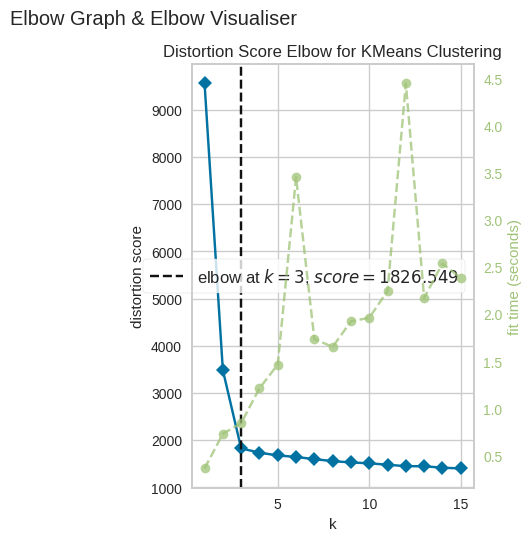

In [ ]:
#Kelbow Visualiser
plt.subplot(1,2,2)
kmeans=KMeans()
visualise=KElbowVisualizer(kmeans,k=(1,16))
visualise.fit(features)
plt.suptitle("Elbow Graph & Elbow Visualiser")
visualise.poof()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

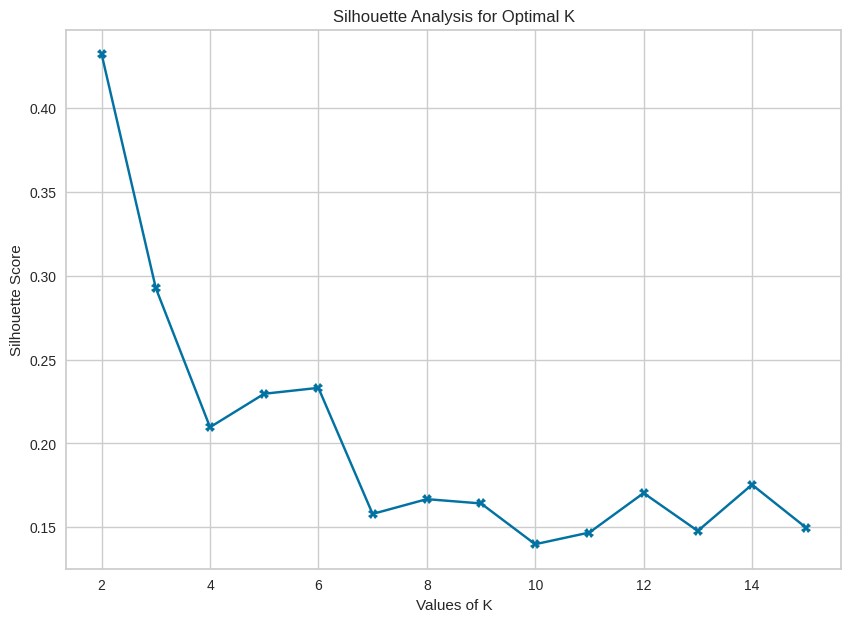

In [ ]:
"""Silhouette Score for each k value"""

silhouette_avg=[]
for i in range(2,16):
  #initialise kmeans cluster
  kmeans=KMeans(n_clusters=i)
  cluster_labels=kmeans.fit_predict(features)
  #Silhouette Score
  silhouette_avg.append(silhouette_score(features,cluster_labels))

plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg, 'bX-')
plt.xlabel("Values of K"), plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal K")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


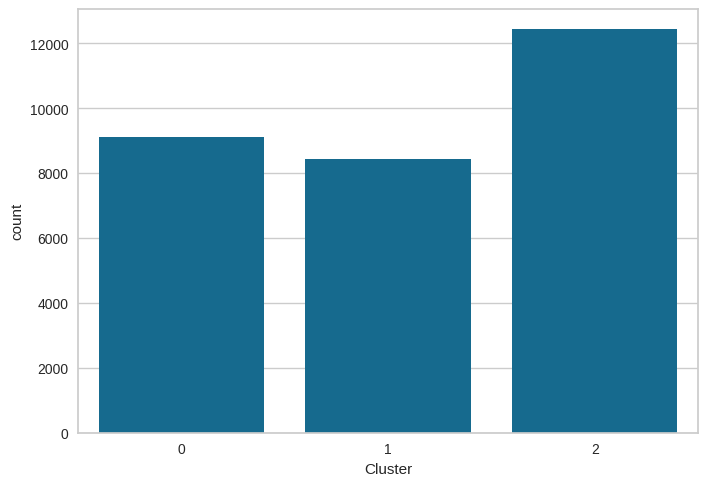

In [ ]:
"""KMeans Model for K=3 as per Elbow Method"""

model=KMeans(n_clusters=3)
model=model.fit(features)

y_km=model.predict(features)
centers=model.cluster_centers_

d["Cluster"]=pd.DataFrame(y_km)
d.to_csv("Cluster_data", index=False)

d["Cluster"].value_counts()

sns.countplot(data=d,x='Cluster')
plt.show()

In [ ]:
"""Analyse the Clusters"""

c_d=pd.read_csv("Cluster_data")
c_d.head()

c_d['Total Search']=c_d.iloc[:,3:38].sum(axis=1)
c_d.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster,Total Search
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,18
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
4,5,F,10,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,16


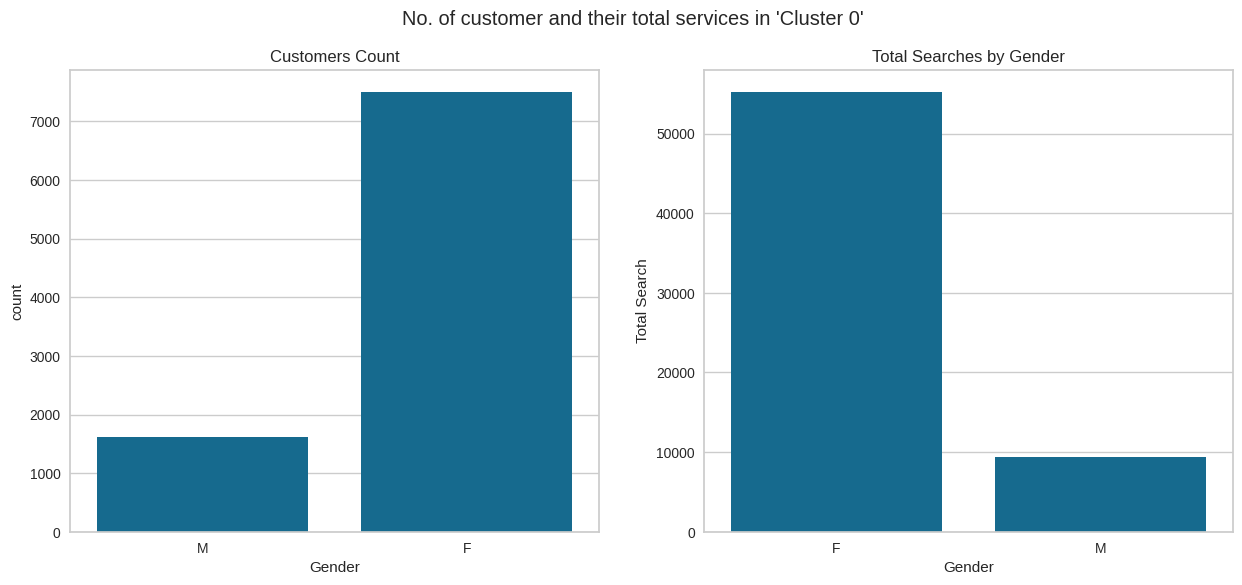

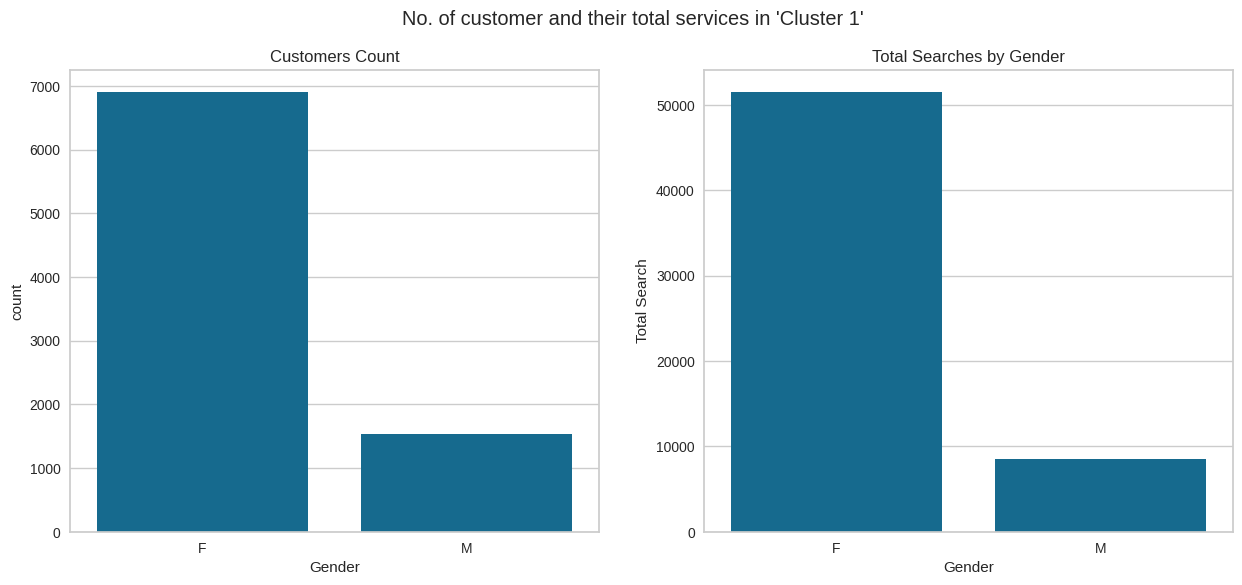

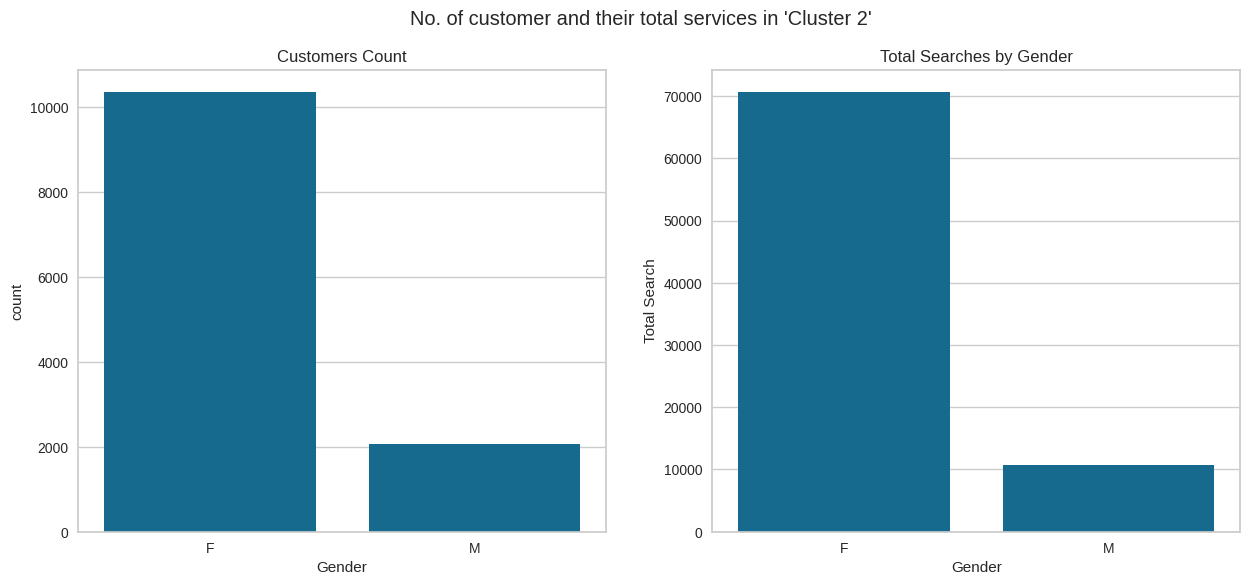

In [ ]:
"""Analyse the cluster 0"""

cl_0=c_d.groupby(['Cluster','Gender'], as_index=False).sum().query("Cluster==0")
cl_0

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_d.query("Cluster==0"), x="Gender")
plt.title("Customers Count")

plt.subplot(1,2,2)
sns.barplot(data=cl_0, x="Gender", y="Total Search")
plt.title("Total Searches by Gender")
plt.suptitle("No. of customer and their total services in 'Cluster 0'")
plt.show()

"""Analyse the cluster 1"""

cl_1=c_d.groupby(['Cluster','Gender'], as_index=False).sum().query("Cluster==1")
cl_1

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_d.query("Cluster==1"), x="Gender")
plt.title("Customers Count")

plt.subplot(1,2,2)
sns.barplot(data=cl_1, x="Gender", y="Total Search")
plt.title("Total Searches by Gender")
plt.suptitle("No. of customer and their total services in 'Cluster 1'")
plt.show()

"""Analyse the cluster 2"""

cl_2=c_d.groupby(['Cluster','Gender'], as_index=False).sum().query("Cluster==2")
cl_2

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_d.query("Cluster==2"), x="Gender")
plt.title("Customers Count")

plt.subplot(1,2,2)
sns.barplot(data=cl_2, x="Gender", y="Total Search")
plt.title("Total Searches by Gender")
plt.suptitle("No. of customer and their total services in 'Cluster 2'")
plt.show()


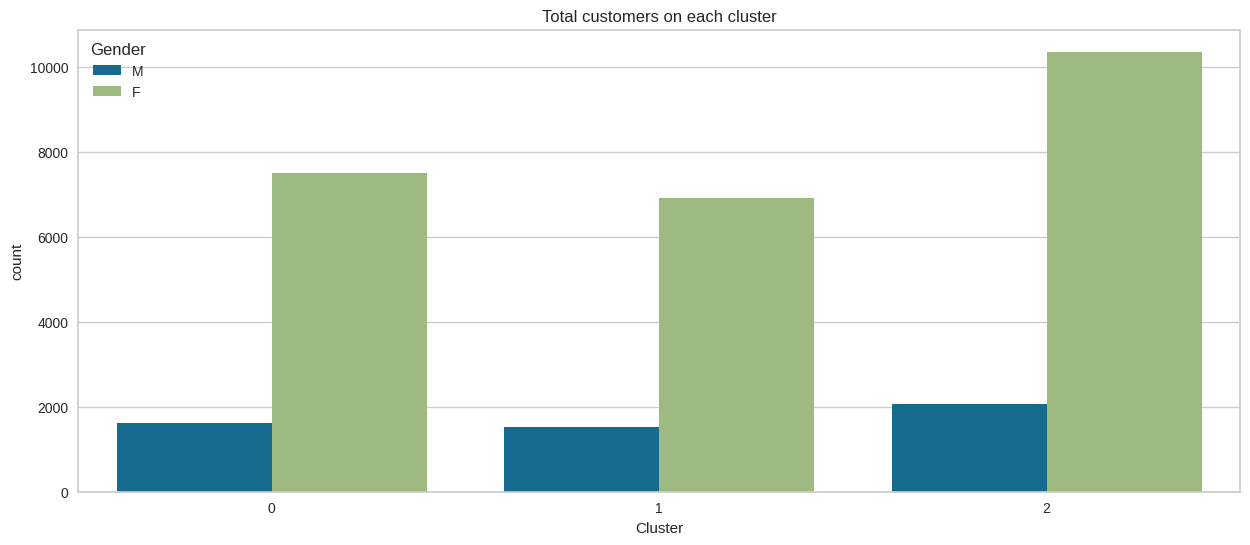

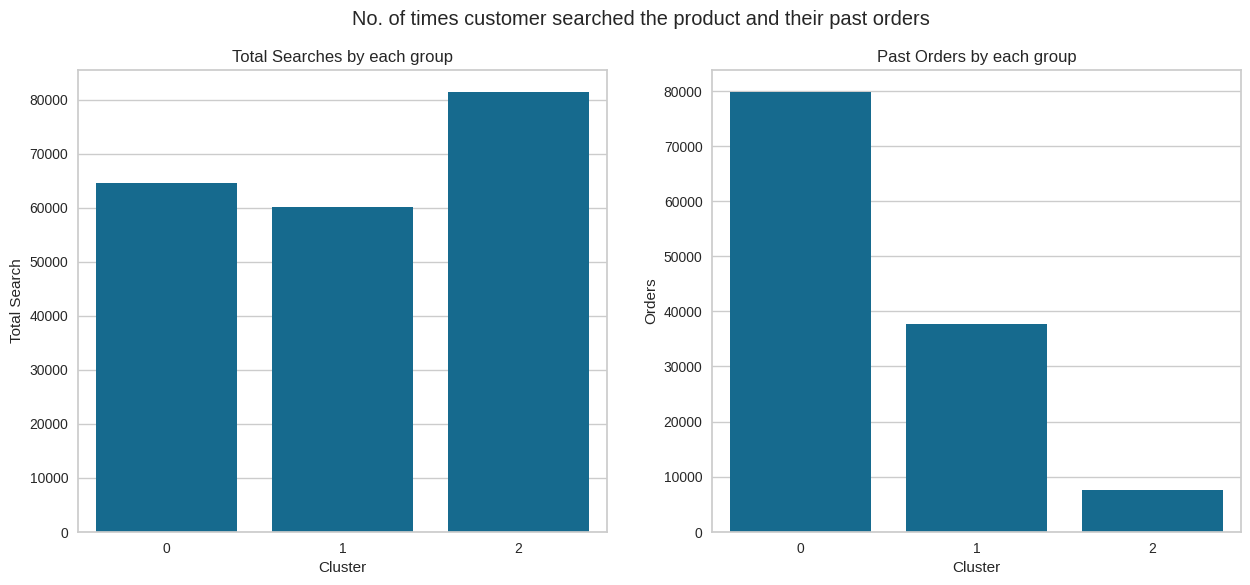

In [ ]:
"""Overall Analysis"""

final_d=c_d.groupby(["Cluster"], as_index=False).sum()
final_d

plt.figure(figsize=(15,6))
sns.countplot(data=c_d,x="Cluster",hue="Gender")
plt.title("Total customers on each cluster")
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=final_d,x="Cluster",y="Total Search")
plt.title("Total Searches by each group")

plt.subplot(1,2,2)
sns.barplot(data=final_d,x="Cluster",y="Orders")
plt.title("Past Orders by each group")
plt.suptitle("No. of times customer searched the product and their past orders")
plt.show()